# Random Walks about London


You can easily retrieve a graph (NetworkX) representation of London locality using the `osmnx` library. Say that you're only looking to walk a short distance, say < 1 km. You can use the `graph_from_point`.

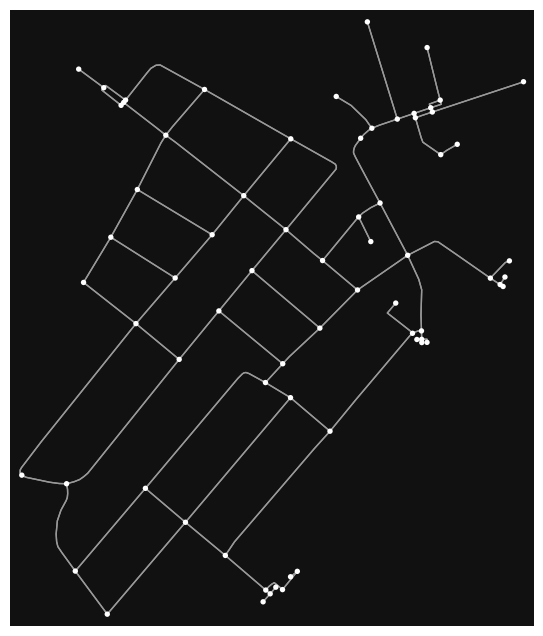

In [ ]:
import osmnx as ox
START = (51.564, 0.00227) # (latitude, longitude)

G = ox.graph.graph_from_point(START, network_type="walk", dist=500, dist_type="network")

fig, ax = ox.plot_graph(G)


For larger examples, like the size of Greater London, Pyrosm is recommended. I would recommend locally downloading the OSM data through [this Geofabrik link](https://download.geofabrik.de/europe/united-kingdom/england/greater-london-latest.osm.pbfa) for instance.

In [ ]:
from pyrosm import OSM
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore", category=FutureWarning, module="pyrosm")
START = (51.564, 0.00227)

osm_parser = OSM("data/greater-london-260126.osm.pbf")

gdf_nodes, gdf = osm_parser.get_network(network_type="walking", nodes=True)
gdf_nodes = gdf_nodes.set_index('id')

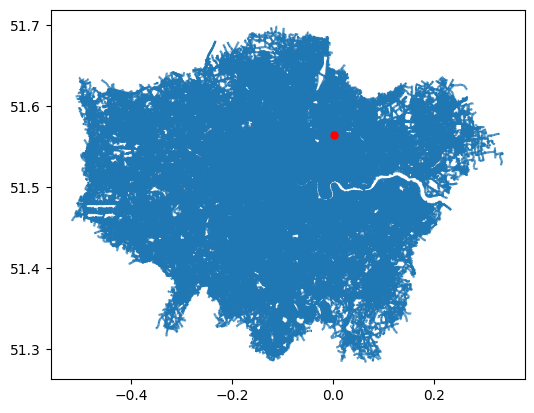

In [3]:
gdf.plot()
plt.plot(START[1], START[0], marker="o", color="red", markersize=5)

There's motivation to approximate the earth as spherical for approximating geodesic distances using numpy arrays for speed on this scale - variation in effective spherical radius will be fractions of a percent across London. For the sake of finding the nearest node, we need only use that the geodesic distance proportional to the haversine distance.

In [ ]:
import numpy as np

def get_nearest_node_index(nodes_df, point: tuple = START) -> int:
    '''Get nearest node to a given point (lat, lon) using numpy for speed'''
    arr = nodes_df[['lat', 'lon']].values
    distances = numpy_haversine_distance(arr, point)
    return np.argmin(distances)

def numpy_haversine_distance(arr: np.ndarray, point: tuple) -> np.ndarray:
    rarr = np.radians(arr)
    rpoint = np.radians(np.array(point))
    dlat = rarr[:, 0] - rpoint[0]
    dlon = rarr[:, 1] - rpoint[1]
    return numpy_haversine_function(dlat) + np.cos(rarr[:, 0]) * np.cos(rpoint[0]) * numpy_haversine_function(dlon)

def numpy_geodesic_distance(arr: np.ndarray, point: tuple = START) -> np.ndarray:
    R = 6_371_000  # Earth's radius in meters
    haversine_vals = numpy_haversine_distance(arr, point)
    return 2 * R * np.arcsin(np.sqrt(haversine_vals))

def numpy_haversine_function(arr: np.ndarray):
    '''Pointwise Haversine function'''
    arr = np.sin(arr / 2) ** 2
    return arr

# pt = START
# nearest_node_index = get_nearest_node_index(gdf_nodes, pt)
# nearest_node_coords = gdf_nodes.iloc[nearest_node_index][['lat', 'lon']].values
# distances = numpy_geodesic_distance(gdf_nodes[['lat', 'lon']].values, pt)
# print("Nearest node index:", nearest_node_index)
# print(f"Nearest node coordinates (lat, lon): {nearest_node_coords[0]:.5f}, {nearest_node_coords[1]:.5f}")
# print(f"Distance to nearest node (m): {distances[nearest_node_index]:.1f}")

Nearest node index: 1394671
Nearest node coordinates (lat, lon): 51.56368, 0.00198
Distance to nearest node (m): 40.7


In [ ]:
# TODOs
# TODO: Comparelengths to geodesic distances
# TODO: Does gdf (edges) come in u,v pairs of directed edges? Expecting mostly pairing of 2 where u1_id=v2_id and u2_id=v1_id
# TODO: Write random walker to output a list of (directed) edges